**Data Set Information:**
Source:http://archive.ics.uci.edu/ml/datasets/online+retail
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Attribute Information: **bold text**

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.


**Business Problem:**
For any company selling it's products it is highly critical to have information about customers. Customer behavious,  region, interest etc. Segmenting customer base, company can focus on target customers for particular prodcut. This directly impacts on fixing product price, promotion budget..overall cost effective strategies.

**Machine Learning Problem:**

In [ ]:
from google.colab import files
files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
import copy

In [ ]:
import pandas as pd
data=pd.read_excel("/content/Online Retail.xlsx",sheet_name='Online Retail')

In [ ]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


From data info it is clear that there are time, float, int, object(string) type of data. Total no of records need to be 541909 and Description, Customer ID seem to have null values or blank values, hence further investigation is necessary

In [ ]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
nullcustomerID_percentage=100*(data['CustomerID'].isnull().sum()/data.shape[0])

In [ ]:
print("% of null values in customer id",nullcustomerID_percentage)

% of null values in customer id 24.926694334288598


In [ ]:
data1=copy.deepcopy(data)

# Data Cleaning and Feature Translation

In [ ]:
data1['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

There are negative quantity in the dataset indicates cancelled orders, hence this needs to be removed

In [ ]:
#Drop records with -ve values in Quanitity column
data1=data1.loc[data1['Quantity']>0]

In [ ]:
print(data1['CustomerID'].sample(10))

124234        NaN
177826    13741.0
443752    15427.0
457724    14309.0
217027        NaN
137435    16253.0
149801    18040.0
126378    17211.0
277156    12540.0
477465    18122.0
Name: CustomerID, dtype: float64


There NaN values in the dataset, keeping only non NULL values

In [ ]:
data1=data1.dropna(axis=0)

In [ ]:
data1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data1.shape

(397924, 8)

In [ ]:
data1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#Plot trend of sales over the perion from 2010 to 2011 on monthly basis *count non null values only
sales_monthly = data.set_index('InvoiceDate')['Quantity'].resample('M').nunique()


In [ ]:
sales_monthly

InvoiceDate
2010-12-31    206
2011-01-31    175
2011-02-28    167
2011-03-31    241
2011-04-30    203
2011-05-31    206
2011-06-30    216
2011-07-31    191
2011-08-31    229
2011-09-30    243
2011-10-31    278
2011-11-30    341
2011-12-31    184
Freq: M, Name: Quantity, dtype: int64

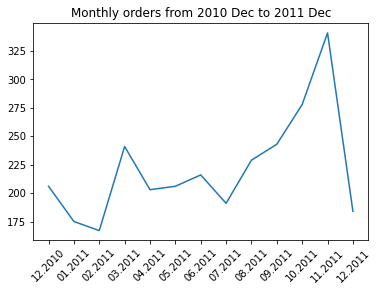

In [ ]:

import matplotlib.pyplot as plt
ax=pd.DataFrame(sales_monthly.values).plot(legend=False)
ax.set_title("Monthly orders from 2010 Dec to 2011 Dec")
plt.xticks(
    range(len(sales_monthly.index)), 
    [x.strftime('%m.%Y') for x in sales_monthly.index], 
    rotation=45
)

plt.show()

It is a clear case of indication to raise question on no of orders dropping in the month of 2011 December. 

In [ ]:
#Investigate the details of data available in the dataset in Dec 2011
invoice_dates=data1.loc[data1['InvoiceDate']>='2011-12-01','InvoiceDate']
print("First Day of the order: %s"%(invoice_dates.min()))
print("Last Day of the order: %s"%(invoice_dates.max()))

First Day of the order: 2011-12-01 08:33:00
Last Day of the order: 2011-12-09 12:50:00


There is incomplete data for the month of Dec 2011, to avoid any misleading analysis further , 2011 December records need to be dropped

In [ ]:
data1=data1.loc[data1['InvoiceDate']<'2011-12-01']

In [ ]:
# Create new column for Total Sales
data1['Total_Sales']=data1['Quantity']*data1['UnitPrice']

In [ ]:
# Create individual customer data for segmentation purpose
customer_data=data1.groupby('CustomerID').agg({'Total_Sales':sum,'InvoiceNo':lambda x:x.nunique()})
customer_data.columns = ['Total_Sales', 'OrderCount']
customer_data['AvgOrderValue'] = customer_data['Total_Sales']/customer_data['OrderCount']

In [ ]:
customer_data=customer_data.rank(method='first')

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(customer_data)

In [ ]:
customer_data_scaled=pd.DataFrame(scaled_features,index=customer_data.index,columns=customer_data.columns)

In [ ]:
customer_data_scaled

,Total_Sales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.725200,-1.731648,1.731648
12347.0,1.457615,1.064296,1.401196
12348.0,0.967579,0.573455,0.929698
12349.0,0.944205,-1.730842,1.683289
12350.0,-0.732233,-1.730036,0.331661
...,...,...,...
18280.0,-1.272239,-0.493663,-0.850712
18281.0,-1.648632,-0.492857,-1.596243
18282.0,-1.605109,-0.492051,-1.518063


In [ ]:
customer_data_scaled.describe()

,Total_Sales,OrderCount,AvgOrderValue
count,4.298000e+03,4.298000e+03,4.298000e+03
mean,-3.823011e-18,1.627363e-18,2.593448e-17
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-1.731648e+00,-1.731648e+00,-1.731648e+00
25%,-8.658239e-01,-8.658239e-01,-8.658239e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.658239e-01,8.658239e-01,8.658239e-01
max,1.731648e+00,1.731648e+00,1.731648e+00


# Model Building
## K-Means Clustering

### Elbow Method to find no of clusters

In [ ]:


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
 kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
   "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(customer_data_scaled)
  sse.append(kmeans.inertia_)


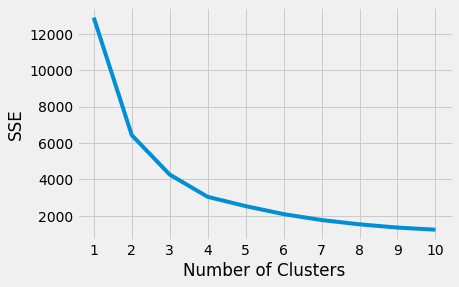

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


From SSE no of clusters=4 

### Silhouette Method
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. 

In [ ]:
 silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(customer_data_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

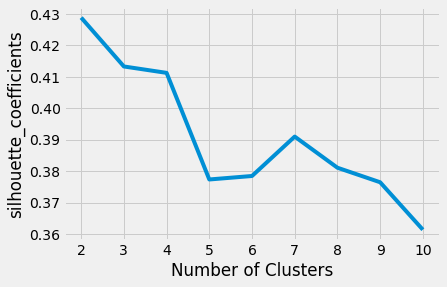

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [ ]:
customer_data_scaled.columns

Index(['Total_Sales', 'OrderCount', 'AvgOrderValue', 'cluster', 'c'], dtype='object')

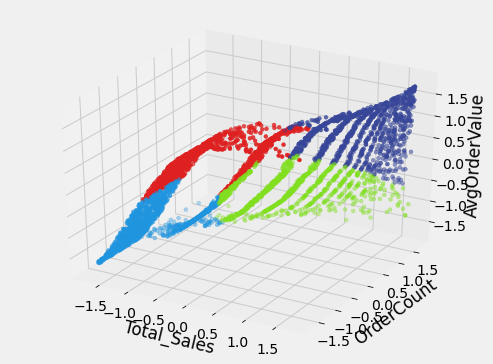

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF','#374698']
kmeans = KMeans(n_clusters=4, random_state=0)
customer_data_scaled['cluster'] = kmeans.fit_predict(customer_data_scaled[['Total_Sales', 'OrderCount', 'AvgOrderValue']])
customer_data_scaled['c'] = customer_data_scaled.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(customer_data_scaled.Total_Sales, customer_data_scaled.OrderCount, customer_data_scaled.AvgOrderValue, c=customer_data_scaled.c, s=15)
ax.set_xlabel('Total_Sales')
ax.set_ylabel('OrderCount')
ax.set_zlabel('AvgOrderValue')
plt.show()

In [ ]:
customer_data_scaled

,Total_Sales,OrderCount,AvgOrderValue,cluster,c
CustomerID,,,,,
12346.0,1.725200,-1.731648,1.731648,0,#DF2020
12347.0,1.457615,1.064296,1.401196,3,#374698
12348.0,0.967579,0.573455,0.929698,3,#374698
12349.0,0.944205,-1.730842,1.683289,0,#DF2020
12350.0,-0.732233,-1.730036,0.331661,0,#DF2020
...,...,...,...,...,...
18280.0,-1.272239,-0.493663,-0.850712,2,#2095DF
18281.0,-1.648632,-0.492857,-1.596243,2,#2095DF
18282.0,-1.605109,-0.492051,-1.518063,2,#2095DF


In [ ]:
kmeans.cluster_centers_

array([[-0.13218904, -0.84932786,  0.79907228],
       [ 0.21680479,  0.71430753, -0.64284933],
       [-1.24660438, -0.79782017, -1.06118901],
       [ 1.20705177,  1.00675365,  0.86725149]])

In [ ]:
final_df_Kmeans=copy.deepcopy(customer_data_scaled)
final_df_Kmeans['cluster']=kmeans.labels_
final_df_Kmeans

,Total_Sales,OrderCount,AvgOrderValue,cluster,c
CustomerID,,,,,
12346.0,1.725200,-1.731648,1.731648,0,#DF2020
12347.0,1.457615,1.064296,1.401196,3,#374698
12348.0,0.967579,0.573455,0.929698,3,#374698
12349.0,0.944205,-1.730842,1.683289,0,#DF2020
12350.0,-0.732233,-1.730036,0.331661,0,#DF2020
...,...,...,...,...,...
18280.0,-1.272239,-0.493663,-0.850712,2,#2095DF
18281.0,-1.648632,-0.492857,-1.596243,2,#2095DF
18282.0,-1.605109,-0.492051,-1.518063,2,#2095DF


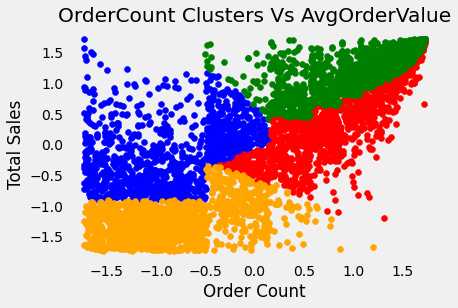

In [ ]:
plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]['Total_Sales'],
    c='blue'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 1]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 1]['Total_Sales'],
    c='red'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]['Total_Sales'],
    c='orange'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 3]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 3]['Total_Sales'],
    c='green'
)
plt.title('OrderCount Clusters Vs AvgOrderValue')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


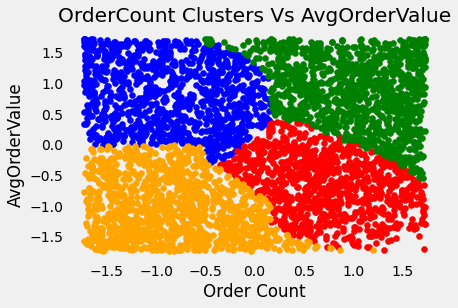

In [ ]:
plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 1]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 3]['OrderCount'], 
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 3]['AvgOrderValue'],
    c='green'
)
plt.title('OrderCount Clusters Vs AvgOrderValue')
plt.xlabel('Order Count')
plt.ylabel('AvgOrderValue')

plt.grid()
plt.show()

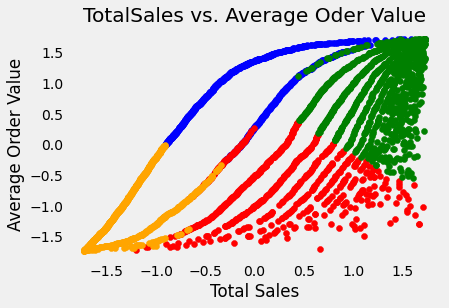

In [ ]:
plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]['Total_Sales'],
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 1]['Total_Sales'],
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]['Total_Sales'],
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 3]['Total_Sales'],
    final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 3]['AvgOrderValue'],
    c='green'
)
plt.title('TotalSales vs. Average Oder Value')
plt.xlabel('Total Sales')
plt.ylabel('Average Order Value')

plt.grid()
plt.show()


In [ ]:
kmeans.cluster_centers_


array([[-0.13218904, -0.84932786,  0.79907228],
       [ 0.21680479,  0.71430753, -0.64284933],
       [-1.24660438, -0.79782017, -1.06118901],
       [ 1.20705177,  1.00675365,  0.86725149]])

# Conclusion:
# # Customer Segmentation for Marketing Strategies
To derive conclusion, cluster_centers_ need to be investigated

* 2nd row, cluster (1) orders frequently, since the avgordervalue is less, it can be concluded that these are the customers who purchase less expensive items.

* row 1 , cluster(0) these are the customers who do not purchase regularly but whatever they have purchased are expensive as visible in avgordervalue. Hence, this segment customers can be targeted to market expensive items

* Cluster (2) -3rd row has smallest values for Total Sales, Ordercount and Averageorder value. Hence, we can conclude this group of customers is one of low cost segment customers.
* 4th row or cluster -3 has highest number for all the three features. Hence, it can be concluded that this segment customers purchase expensive items and can be targeted for increasing Business revenue.




In [ ]:
not_expensive_cluster = final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 0]

pd.DataFrame(
    data1.loc[
        data1['CustomerID'].isin(not_expensive_cluster.index)].groupby('Description').count()['StockCode'].sort_values(ascending=False).head()
)

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,201
WHITE HANGING HEART T-LIGHT HOLDER,157
ASSORTED COLOUR BIRD ORNAMENT,155
SET OF 3 CAKE TINS PANTRY DESIGN,151
PARTY BUNTING,137


In [ ]:
expensive_cluster = final_df_Kmeans.loc[final_df_Kmeans['cluster'] == 2]

pd.DataFrame(
    data1.loc[
        data1['CustomerID'].isin(expensive_cluster.index)].groupby('Description').count()['StockCode'].sort_values(ascending=False).head()
)

,StockCode
Description,
REX CASH+CARRY JUMBO SHOPPER,135
WHITE HANGING HEART T-LIGHT HOLDER,134
REGENCY CAKESTAND 3 TIER,79
ASSORTED COLOUR BIRD ORNAMENT,78
BAKING SET 9 PIECE RETROSPOT,72


## Conclusion of Recommendation of items for Customer Segments

* From the above tables the expensive items and less expensive items can be identified and recommended for respective segment of customers
* REX CASH+CARRY JUMBO SHOPPER and 
WHITE HANGING HEART T-LIGHT HOLDER 	 for expensive are recommeded to be targeted to customers who are grouped in cluster 2
* REGENCY CAKESTAND 3 TIER ,
WHITE HANGING HEART T-LIGHT HOLDER 	and 
ASSORTED COLOUR BIRD ORNAMENT  are the top items to be targeted to customers who are grouped under cluster 0 and cluster1